## Laboratorio 3
### K-Means para clasificación de Malware
> #### Gerardo Méndez 18239

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/sample_malware.csv', index_col="Unnamed: 0")

### PARTE 1 - INGENIERÍA DE CARACTERÍSTICAS

#### Exploración de Datos

In [3]:
df.head(10)

,e_lfanew,characteristics,size_of_image,image_base,IDEE_size,IDEE_virtual_address,IDEI_size,IDEI_virtual_address,IDER_size,IDER_virtual_address,.rsrc,UPX0,UPX1,UPX2,.text,.rdata,.data,no_imported_symbols,no_exported_symbols
0,240,8462,811008,268435456,176,807356,444,806912,0,0,0,1,1,1,0,0,0,10,5
1,240,8462,811008,268435456,176,807356,444,806912,0,0,0,1,1,1,0,0,0,10,5
2,224,271,32768,4194304,0,0,328,28760,88,28672,1,1,1,0,0,0,0,8,0
3,232,271,2048000,4194304,0,0,332,2044812,908,2043904,1,1,1,0,0,0,0,8,0
4,240,8462,692224,268435456,176,689604,456,689148,1020,688128,1,1,1,0,0,0,0,10,5
5,224,271,32768,4194304,0,0,328,28760,88,28672,1,1,1,0,0,0,0,8,0
6,224,271,32768,4194304,0,0,328,28760,88,28672,1,1,1,0,0,0,0,8,0
7,224,271,32768,4194304,0,0,328,28760,88,28672,1,1,1,0,0,0,0,8,0
8,224,271,32768,4194304,0,0,328,28760,88,28672,1,1,1,0,0,0,0,8,0
9,256,271,782336,4194304,0,0,520,778240,0,0,0,1,1,1,0,0,0,12,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   e_lfanew              40 non-null     int64
 1   characteristics       40 non-null     int64
 2   size_of_image         40 non-null     int64
 3   image_base            40 non-null     int64
 4   IDEE_size             40 non-null     int64
 5   IDEE_virtual_address  40 non-null     int64
 6   IDEI_size             40 non-null     int64
 7   IDEI_virtual_address  40 non-null     int64
 8   IDER_size             40 non-null     int64
 9   IDER_virtual_address  40 non-null     int64
 10  .rsrc                 40 non-null     int64
 11  UPX0                  40 non-null     int64
 12  UPX1                  40 non-null     int64
 13  UPX2                  40 non-null     int64
 14  .text                 40 non-null     int64
 15  .rdata                40 non-null     int64
 16  .data     

In [5]:
df.shape

(40, 19)

#### Preprocesamiento

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sscaler = StandardScaler()

In [8]:
scaled_df = sscaler.fit_transform(df)

In [9]:
scaled_df[:5]

array([[ 0.94064699,  2.64575131, -0.20370474,  2.64575131,  2.64575131,
         2.82380741,  1.27752193,  0.85413385, -0.58142667, -0.37605208,
        -1.44115338,  0.5       ,  0.5       ,  2.38047614, -0.5       ,
        -0.5       , -0.5       , -0.44962007,  2.64575131],
       [ 0.94064699,  2.64575131, -0.20370474,  2.64575131,  2.64575131,
         2.82380741,  1.27752193,  0.85413385, -0.58142667, -0.37605208,
        -1.44115338,  0.5       ,  0.5       ,  2.38047614, -0.5       ,
        -0.5       , -0.5       , -0.44962007,  2.64575131],
       [-0.98888529, -0.37796447, -0.70521302, -0.37796447, -0.37796447,
        -0.37672709,  0.13582282, -0.51438785, -0.31368441, -0.34052759,
         0.69388867,  0.5       ,  0.5       , -0.42008403, -0.5       ,
        -0.5       , -0.5       , -0.51490067, -0.37796447],
       [-0.02411915, -0.37796447,  0.59342947, -0.37796447, -0.37796447,
        -0.37672709,  0.17519176,  3.03120595,  2.18118672,  2.1563364 ,
         0.693

### PARTE 2 – IMPLEMENTACIÓN DEL MODELO

In [10]:
## importamos librerias necesarias para la seleccion de modelo
from sklearn import cluster

#### Implementación

In [11]:
## creacion de modelo
kms = cluster.KMeans(
    init="random",
    n_clusters=5,
    random_state=42
)

In [12]:
kms.fit(scaled_df)

KMeans(init='random', n_clusters=5, random_state=42)

#### Método del codo

In [13]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []

for k in range(1, 11):
    kms = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kms.fit(scaled_df)
    sse.append(kms.inertia_)

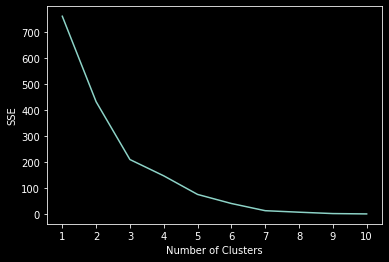

In [14]:
plt.style.use("dark_background")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Podemos observar que el número óptimo de clusters se encuentra entre 5 y 6. En este caso, tomamos 5 clusters, debido a que el cambio de 4 a 5 es aún significativo contrario al cambio de 5 a 6.

### Silhouette

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
coef_silhouette = []

for k in range(2, 11):
    kms = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kms.fit(scaled_df)
    score = silhouette_score(scaled_df, kms.labels_)
    coef_silhouette.append(score)

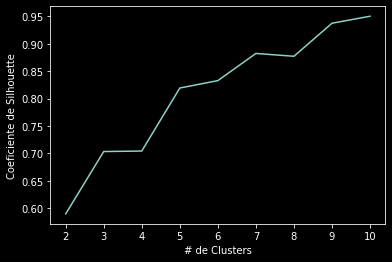

In [17]:
plt.style.use("dark_background")
plt.plot(range(2, 11), coef_silhouette)
plt.xticks(range(2, 11))
plt.xlabel("# de Clusters")
plt.ylabel("Coeficiente de Silhouette")
plt.show()

### PARTE 3 - Conclusiones

**1. ¿Para qué número de clústeres se obtiene el coeficiente de sillhouete más alto?**
> Para el método de silhouette, el coeficiente más alto se da con 10 clústers.

**2.  ¿Coincide con el método del codo?**
> No coincide del todo, ya que con el método del codo obtuvimos que 5 clústers era el número indicado, y más confiable.

**3. ¿Cuántas familias existen entre los ejemplares de malware proporcionados?**
> Según los resultados obtenidos implementando el modelo, se tienen 5 familias de malware dentro de los ejemplares proporcionados para el laboratorio.